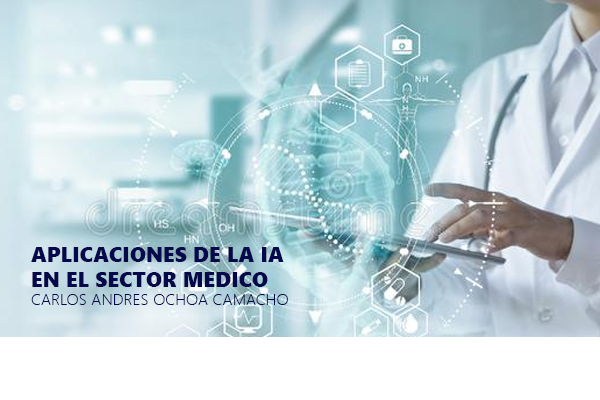

**Inteligencia Artificial en el Sistema de Salud**
*Carlos Andrés Ochoa Camacho - 2152015*

---

Las instituciones de salud por su complejidad tienen demasiados procesos, estas verian un beneficio en la implementacion de algoritmos de inteligencia artificial los cuales pueden ser usados en muchos de estos procesos como: deteccion de enfermedades, compra inteligente de medicamentos, mantenimiento de dispositivos medicos, planteamiento de modelos matematicos para modelar la poblacion humana y responder acordemente a las necesidades de esta, entre otros.

En este proyecto se explorara el indice de nacidos vivos en Bucaramanga, segun su tiempo de gestacion y datos familiares (como el numero previo de hijos) para predecir el peso de la criatura y si esta requerira algun cuidado especial.

Para el modelamiento de los datos obtenidos de la Alcaldia de Bucaramanga para nacidos vivos en el periodo Enero 2016 a Noviembre 2020, usaremos varias librerias de regresion (SVR, DecisionTrees y Tensorflow/Keras) y compararemos sus puntajes para determinar cual es la que mejor se adapta a los datos.





In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/nacidos')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/nacidos


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

d = pd.read_csv("nacidosbucaramanga.csv", sep=",")
d.head()

ORDEN     AREA NACIMIENTO  ... GRUPO ETARIO MADRE CURSO DE VIDA MADRE
0     11  CABECERA MUNICIPAL  ...       19 a 28 años             Jovenes
1     12  CABECERA MUNICIPAL  ...       29 a 59 años             Adultez
2      1  CABECERA MUNICIPAL  ...       29 a 59 años             Adultez
3      2  CABECERA MUNICIPAL  ...       19 a 28 años             Jovenes
4      3  CABECERA MUNICIPAL  ...       19 a 28 años             Jovenes

[5 rows x 30 columns]

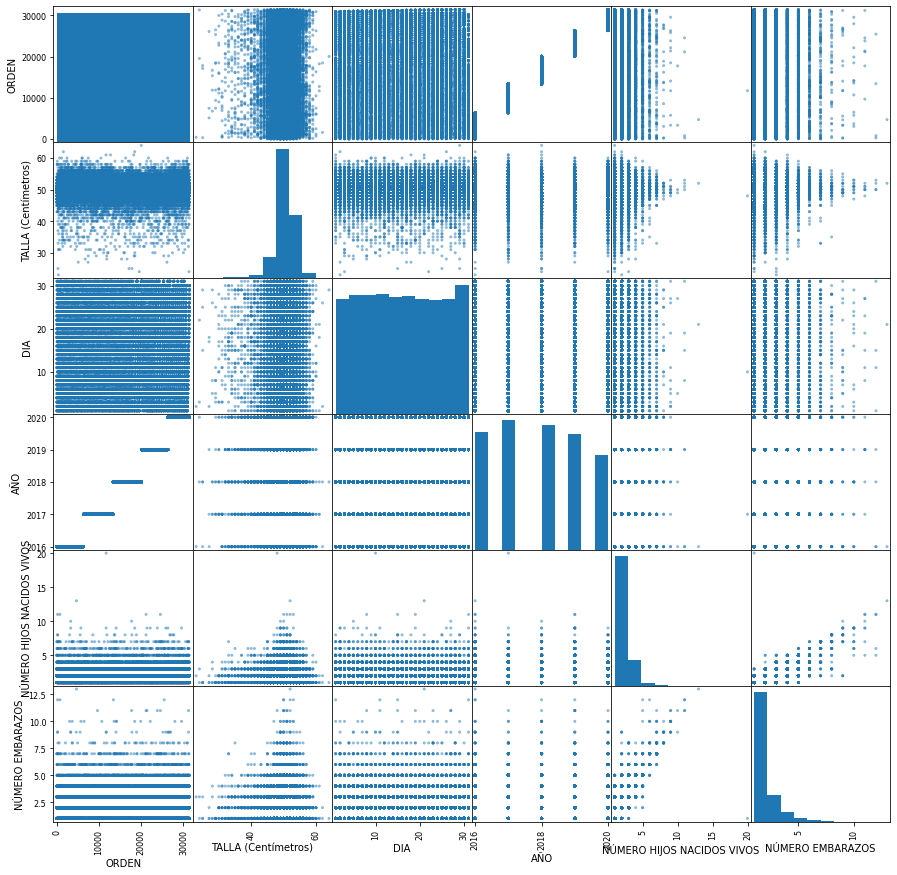

In [ ]:
pd.plotting.scatter_matrix(d, figsize=(15,15));

*Al parecer hay una correlacion entre el numero de embarazos, el numero de hijos nacidos vivos y la talla.*

*Se hara una limpieza del dataset y se buscaran nuevas correlaciones antes de entrenar los modelos.* 

**Limpieza de Datos**

In [ ]:
#@title
data = pd.read_csv("nacidosbucaramanga.csv", sep=",")
del data['FECHA NACIMIENTO']
del data['DIA SEMANA']
del data['DIA']
del data['MES']
del data['AÑO']
del data['TIPO PARTO']
del data['GRUPO SANGUINEO']
del data['FACTOR RH']
del data['PERTENENCIA ÉTNICA']
del data['NIVEL EDUCATIVO PADRE']
del data['NIVEL EDUCATIVO MADRE']
del data['GRUPO ETARIO PADRE']
del data['GRUPO ETARIO MADRE']
del data['CURSO DE VIDA MADRE']
del data['CURSO DE VIDA PADRE']
del data['BARRIO']

In [ ]:
#@title
data.rename(columns={"AREA NACIMIENTO": "arean"}, inplace = True)
data.arean.unique()
data.COMUNA.unique()

array(['1 NORTE', '10 PROVENZA', '11 SUR', '7 LA CIUDADELA',
       '12 CABECERA DEL LLANO', '13 ORIENTAL', '14 MORRORRICO',
       '15 CENTRO', '16 LAGOS DEL CACIQUE', '17 MUTIS', '2 NORORIENTAL',
       '3 SAN FRANCISCO', '4 OCCIDENTAL', '5 GARCIA ROVIRA',
       '6 LA CONCORDIA', '8 SUR OCCIDENTE', 'SIN INFORMACION',
       '9 LA PEDREGOSA', 'CORREG 1', 'CORREG  3', 'CORREG  2'],
      dtype=object)

In [ ]:
#@title
for i in range(0,len(data)):
  if data.iloc[i,2] == 'FEMENINO':
    data.iloc[i,2] = 0
  else:
    data.iloc[i,2] = 1
  if data.iloc[i,1] == 'CABECERA MUNICIPAL':
    data.iloc[i,1] = 0
  elif data.iloc[i,1] == 'RURAL DISPERSO' :
    data.iloc[i,1] = 2
  elif data.iloc[i,1] == 'CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)' :
    data.iloc[i,1] = 3
  if data.iloc[i,6] == '1 NORTE':
    data.iloc[i,6] = 1
  elif data.iloc[i,6] == '10 PROVENZA':
    data.iloc[i,6] = 10
  elif data.iloc[i,6] == '11 SUR':
    data.iloc[i,6] = 11
  elif data.iloc[i,6] == '7 LA CIUDADELA':
    data.iloc[i,6] = 7
  elif data.iloc[i,6] == '12 CABECERA DEL LLANO':
    data.iloc[i,6] = 12
  elif data.iloc[i,6] == '13 ORIENTAL':
    data.iloc[i,6] = 13
  elif data.iloc[i,6] == '14 MORRRORRICO':
    data.iloc[i,6] = 14
  elif data.iloc[i,6] == '15 CENTRO':
    data.iloc[i,6] = 15
  elif data.iloc[i,6] == '16 LAGOS DEL CACIQUE':
    data.iloc[i,6] = 16
  elif data.iloc[i,6] == '17 MUTIS':
    data.iloc[i,6] = 17
  elif data.iloc[i,6] == '2 NORORIENTAL':
    data.iloc[i,6] = 2
  elif data.iloc[i,6] == '3 SAN FRANCISCO':
    data.iloc[i,6] = 3
  elif data.iloc[i,6] == '4 OCCIDENTAL':
    data.iloc[i,6] = 4
  elif data.iloc[i,6] == '5 GARCIA ROVIRA':
    data.iloc[i,6] = 5
  elif data.iloc[i,6] == '6 LA CONCORDIA':
    data.iloc[i,6] = 6
  elif data.iloc[i,6] == '8 SUR OCCIDENTE':
    data.iloc[i,6] = 8
  elif data.iloc[i,6] == 'SIN INFORMACION':
    data.iloc[i,6] = 0
  elif data.iloc[i,6] == '9 LA PEDREGOSA':
    data.iloc[i,6] = 9
  elif data.iloc[i,6] == 'CORREG 1':
    data.iloc[i,6] = 97
  elif data.iloc[i,6] == 'CORREG  2':
    data.iloc[i,6] = 98
  elif data.iloc[i,6] == 'CORREG  3':
    data.iloc[i,6] = 99
  if data.iloc[i,9] == 'SUBSIDIADO':
    data.iloc[i,9] = 0
  elif data.iloc[i,9] == 'CONTRIBUTIVO':
    data.iloc[i,9] = 1

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(1)
data.head()

ORDEN  arean  SEXO  ...  EDAD PADRE  ULTIMO AÑO APROBADO MADRE  EDAD MADRE
0     11      0     0  ...        28.0                       11.0        28.0
1     12      0     0  ...        37.0                        9.0        37.0
2      1      0     0  ...        30.0                        9.0        30.0
3      2      0     1  ...        26.0                        5.0        26.0
4      3      0     1  ...        24.0                        6.0        24.0

[5 rows x 14 columns]

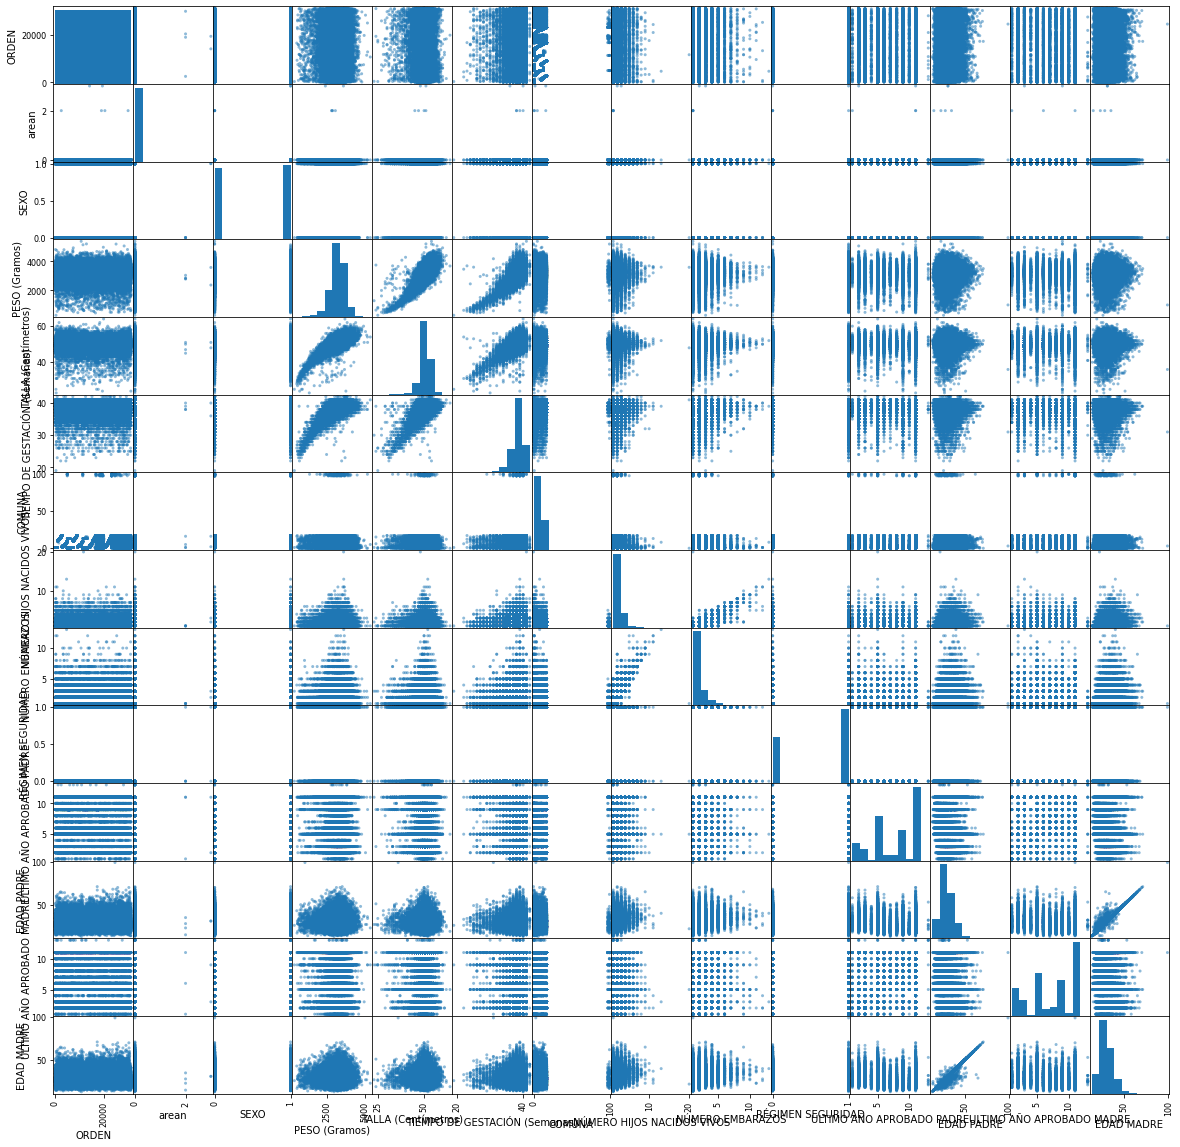

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(20,20));

In [ ]:
#@title
datanp = data.to_numpy()

In [ ]:
#@title
where_are_NaNs = np.isnan(datanp)
datanp[where_are_NaNs] = 0

Con las columnas que han quedado luego de la limpieza, se procedera a partir el dataset en una proporcion 82/18 y con eso se entrenaran los diferentes modelos, aunque tambien se ha eliminado mas columnas en etapas posteriores ya que no aportaban nada al modelo



In [ ]:
n = int(len(datanp)*0.82)

X_train = datanp[:n, [1,2,5,6,8,9]]
X_test = datanp[n:, [1,2,5,6,8,9]]
y_train = datanp[:n, 3]
y_test = datanp[n:, 3]

print(datanp.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31434, 14) (25775, 6) (5659, 6) (25775,) (5659,)


**DTR**


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

est = DecisionTreeRegressor(random_state=0)
est.fit(X_train, y_train)
print ("MSE %.3f"% mean_squared_error(y_test, est.predict(X_test)))

MSE 156453.449


In [ ]:
print(X_test[9])
xp = X_test[9].reshape(1,-1)
print(est.predict(xp))
pred =est.predict(X_test)

[ 0.  1. 37.  3.  1.  1.]
[2953.75]


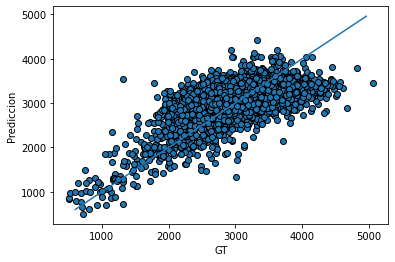

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))

ax.plot([y_test.min()+100, y_test.max()-100], [y_test.min()+100, y_test.max()-100])
ax.set_xlabel('GT')
ax.set_ylabel('Prediccion')
plt.show()

**TensorFlow**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_predict

In [ ]:
def modelo():
  model = Sequential()
  model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
estimator = KerasRegressor(build_fn=modelo, nb_epoch=50, batch_size=20, verbose=False)
kfold = KFold(n_splits=10)
estimator.fit(X_train, y_train)
results = cross_val_predict(estimator, X_test, y_test, cv=kfold)
print("%.2f Media (%.2f) std" % (results.mean(), results.std()))

3140.47 Media (281.11) std


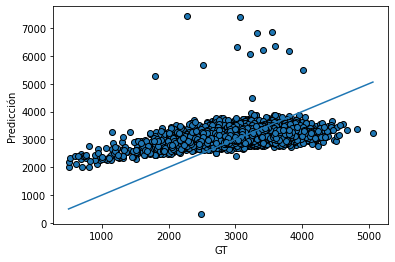

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, results, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
ax.set_xlabel('GT')
ax.set_ylabel('Predicción')
plt.show()

**SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = SVR(kernel='linear')
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

In [ ]:
print ("MSE %.3f"% mean_squared_error(y_test, pred))


MSE 150107.941


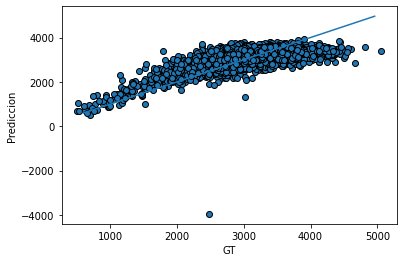

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))

ax.plot([y_test.min()+100, y_test.max()-100], [y_test.min()+100, y_test.max()-100])
ax.set_xlabel('GT')
ax.set_ylabel('Prediccion')
plt.show()

**Conclusiones / Analisis de Puntajes**

---



Entre los tres diferentes tipos de estimadores utilizados el que mejor se ha adaptado a los datos ha sido el arbol de decision, este muestra un puntaje de acierto relativamente alto.

Las redes neuronales han dado como resultado algunas predicciones muy fuera de linea (de mas de 5000g) ademas de una pendiente menos pronunciada con respecto a la pendiente del groundtruth.

Support Vector Reggressor tambien ha mostrado resultados muy pobres ademas del gasto en recursos computacionales tan alto cuando se tiene un dataset de esta magnitud.

Algunas clasificaciones socioeconomicas se tuvieron que eliminar en el camino ya que no aportaban mucho al modelo o la cantidad de datos era muy escaso (ejemplo numero de nacidos vivos por barrio), asi mismo el uso de la columna semanas de gestacion puede que cree cierto sesgo en los modelos.

Se debe investigar mas con diferentes combinaciones en columnas, ademas del uso del aumento artificial de datos para determinar si se encuentra alguna mejora en las predicciones.


**Bibliografia**

---

*   Nacidos Vivos Municipio de Bucaramanga Enero 2016 a Noviembre 2020. 
https://www.datos.gov.co/Salud-y-Protecci-n-Social/Nacidos-Vivos-en-Municipio-de-Bucaramanga-enero-20/x5xp-9w4b



